**FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS**

## Part 1: Data Preparation and Exploration

1.	Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately.

2.	Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.

3.	Data Preprocessing: Handle any missing values or anomalies identified during the exploration phase.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Time Series Models
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.metrics import mean_squared_error, mean_absolute_error


In [5]:
df = pd.read_csv('/content/exchange_rate.csv')

In [6]:
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [7]:
df.shape

(7588, 2)

In [8]:
df.columns

Index(['date', 'Ex_rate'], dtype='object')

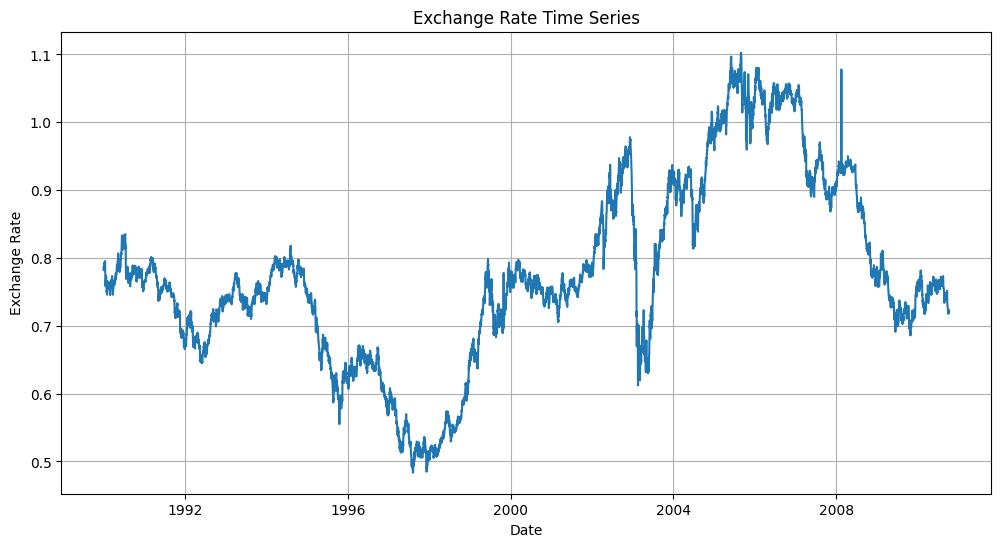

In [9]:
# Convert the 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')

# Set 'date' as the index
df.set_index('date', inplace=True)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df['Ex_rate'])
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Exchange Rate Time Series')
plt.grid(True)
plt.show()


In [10]:
# Check for missing values
print(df.isnull().sum())

Ex_rate    0
dtype: int64


In [11]:
# Drop rows with missing values:
df_dropped = df.dropna()

In [12]:
# Fill missing values with a specific value (e.g., mean):
df_filled = df.fillna(df.mean())

In [13]:
# Interpolate missing values:
df_interpolated = df.interpolate()

In [14]:
from scipy import stats
df['z_score'] = stats.zscore(df['Ex_rate'])
df_no_outliers = df[abs(df['z_score']) < 3]
# Remove potential outliers beyond 3 standard deviations

In [15]:
df

,Ex_rate,z_score
date,,
1990-01-01,0.785500,0.062413
1990-01-02,0.781800,0.035329
1990-01-03,0.786700,0.071197
1990-01-04,0.786000,0.066073
1990-01-05,0.784900,0.058021
...,...,...
2010-10-06,0.718494,-0.428073
2010-10-07,0.721839,-0.403587
2010-10-08,0.723197,-0.393647


## Part 2: Model Building - ARIMA

1.	Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.

2.	Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.

3.	Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.

4.	Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.


In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

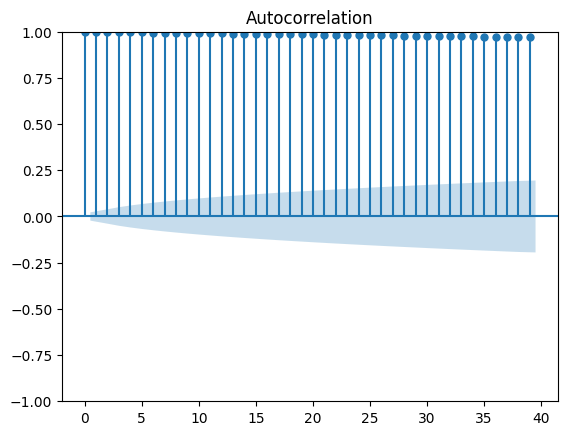

In [17]:
# Plot ACF
plot_acf(df['Ex_rate'])
plt.show()

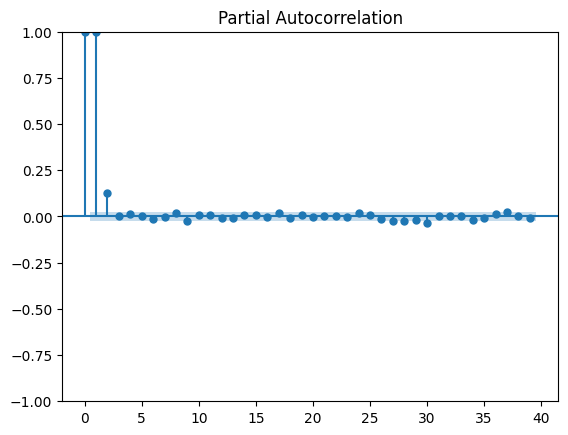

In [18]:
# Plot PACF
plot_pacf(df['Ex_rate'])
plt.show()

In [19]:
from statsmodels.tsa.arima.model import ARIMA
p = 1
d = 1
q = 1

# Fit the ARIMA model
model = ARIMA(df['Ex_rate'], order=(p, d, q))  # Replace p, d, q with actual values
es_result = model.fit()
print(es_result.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Mon, 19 Aug 2024   AIC                         -56102.322
Time:                        01:04:02   BIC                         -56081.519
Sample:                    01-01-1990   HQIC                        -56095.182
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

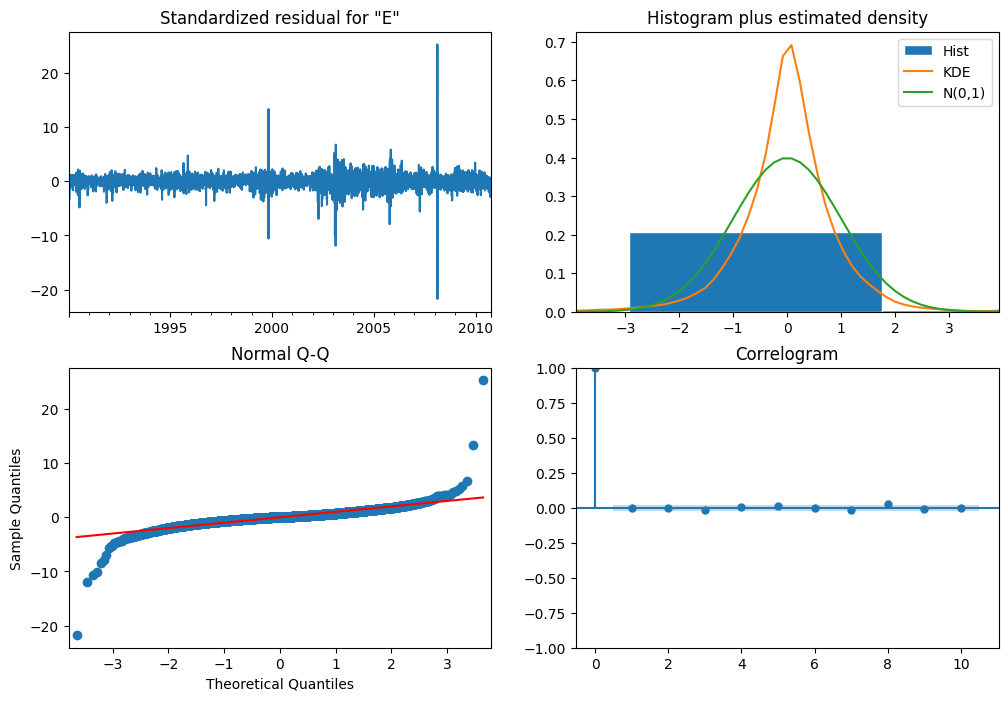

In [20]:
# Plot the residuals
es_result.plot_diagnostics(figsize=(12, 8))
plt.show()


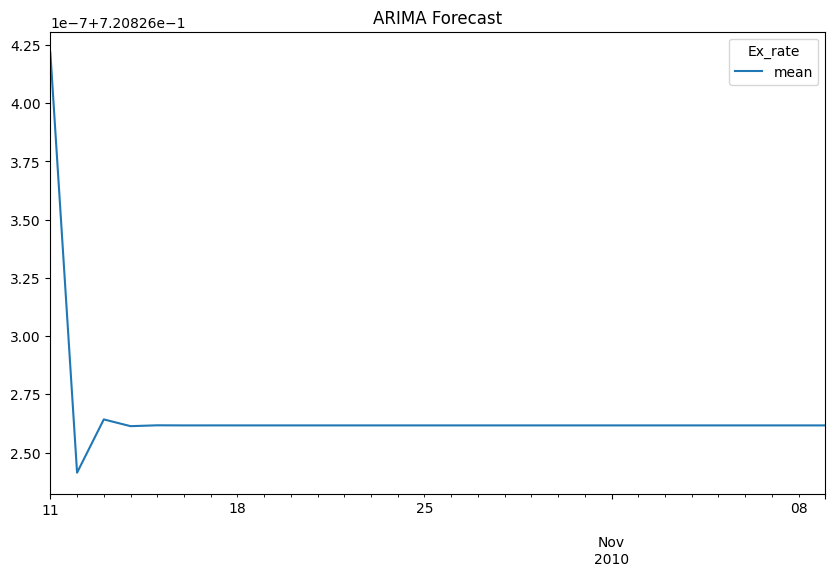

In [21]:
# Forecasting with ARIMA
forecast_arima = es_result.get_forecast(steps=30)
forecast_arima_df = forecast_arima.summary_frame()
forecast_arima_df[['mean']].plot(title='ARIMA Forecast', figsize=(10, 6))
plt.show()

## Part 3: Model Building - Exponential Smoothing

1.	Model Selection: Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters).

2.	Parameter Optimization: Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and components.

3.	Model Fitting and Forecasting: Fit the chosen Exponential Smoothing model and forecast future values. Compare these forecasts visually with the actual data.


In [25]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing

# Assuming the time series is non-seasonal and has no trend, we use Simple Exponential Smoothing
model = SimpleExpSmoothing(df['Ex_rate'])

# Fit the model
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:             SimpleExpSmoothing   SSE                              0.273
Optimized:                       True   AIC                         -77644.968
Trend:                           None   BIC                         -77631.099
Seasonal:                        None   AICC                        -77644.963
Seasonal Periods:                None   Date:                 Mon, 19 Aug 2024
Box-Cox:                        False   Time:                         01:09:00
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8683721                alpha                 True
initial_level              0.7855000                

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


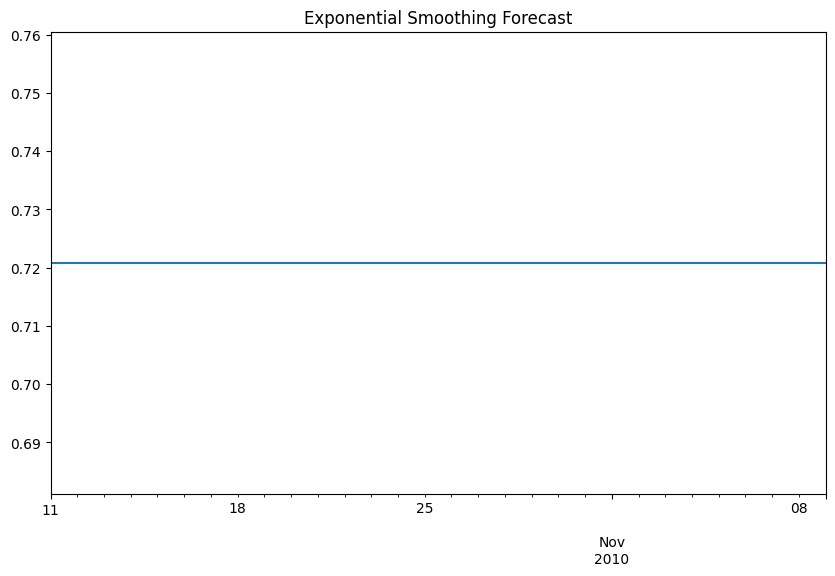

In [29]:
forecast_es = model_fit.forecast(steps=30)
forecast_es.plot(title='Exponential Smoothing Forecast', figsize=(10, 6))
plt.show()

In [30]:
# Define a grid of hyperparameters to search
params_grid = {'smoothing_level': np.arange(0.1, 1.0, 0.1)}

# Perform grid search
best_aic = float('inf')
best_params = None
for smoothing_level in params_grid['smoothing_level']:
  model = SimpleExpSmoothing(df['Ex_rate'], initialization_method="heuristic")
  model_fit = model.fit(smoothing_level=smoothing_level)
  aic = model_fit.aic
  if aic < best_aic:
    best_aic = aic
    best_params = {'smoothing_level': smoothing_level}

print("Best AIC:", best_aic)
print("Best Parameters:", best_params)

Best AIC: -77637.65809642129
Best Parameters: {'smoothing_level': 0.9}


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._

## Part 4: Evaluation and Comparison

1.	Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.

2.	Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.

3.	Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.


In [42]:
actual = df['Ex_rate'][-30:]  # Replace with actual test set
mae_arima = mean_absolute_error(actual, forecast_arima_df['mean'])
rmse_arima = np.sqrt(mean_squared_error(actual, forecast_arima_df['mean']))

mae_es = mean_absolute_error(actual, forecast_es)
rmse_es = np.sqrt(mean_squared_error(actual, forecast_es))
print(f'ARIMA' )
print(f'MAE: {mae_arima}')
print(f'RMSE: {rmse_arima}')
print('\n')
print(f'Exponential Smoothing ')
print(f'MAE: {mae_es} ')
print(f'RMSE: {rmse_es}')


ARIMA
MAE: 0.012724006489305202
RMSE: 0.016982710912755217


Exponential Smoothing 
MAE: 0.012707329121023495 
RMSE: 0.016957663728794713



> Based on the observed results and error metrics (MAE and RMSE), you would compare the performance of ARIMA and Exponential Smoothing

> **ARIMA:** Better at capturing the overall trend and minimizing large errors (due to lower RMSE), but might have more frequent small errors (due to slightly higher MAE). Suitable if minimizing large deviations is crucial.

> **Exponential Smoothing:** More consistent in minimizing small errors (lower MAE), but might be less accurate in capturing large fluctuations (higher RMSE). Suitable if overall stability of predictions is preferred.

**Advantages and Limitations:**
Advantages

ARIMA : Can capture complex patterns (trend, seasonality, autocorrelations).

Exponential Smoothing: Simple to implement and computationally efficient

Limitations

ARIMA: Requires careful parameter selection (p, d, q) and might overfit to noise

Exponential Smoothing: Less flexible for complex patterns compared to ARIMA.

> ARIM is better than Exponential Smoothing in this case